In [11]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras.applications.inception_v3 import InceptionV3 , preprocess_input , decode_predictions
from keras import regularizers
from keras.layers.advanced_activations import PReLU
from keras import models
from keras.applications import ResNet50
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import pydot
import os
from keras.preprocessing import image

In [5]:
train_img_path = 'My_Cars/trainCropped'
test_img_path = 'My_Cars/test'

In [6]:
car_name_train = {}
for i in os.listdir(train_img_path):
    car_name_train[i] =  os.listdir(train_img_path+'/'+i)
car_img_list = []
car_name_list = []
car_classes = []
car_dr = []
for i in car_name_train:
    car_classes.append(i)
for i , j in enumerate(car_name_train.values()):
    for img in j :
        car_img_list.append(img)
        car_name_list.append(car_classes[i])
for i in range(len(car_name_list)):
    car_dr.append(train_img_path+'/'+car_name_list[i]+'/'+car_img_list[i])

In [49]:
model = Sequential()
model = load_model('Saved_Models/weights.best.from_scratch39.hdf5')

In [50]:
test_img = []
ground_truth = []
for brand in os.listdir(test_img_path):
    n = 0
    for img in os.listdir(test_img_path+'/'+brand):
        n += 1
        if n == 5:
            break
        i = image.load_img(test_img_path+'/'+brand+'/'+img , target_size = (128, 128))
        i = image.img_to_array(i)
        i = preprocess_input(i)
        ground_truth.append(brand)
        test_img.append(i)    

In [51]:
test_img = np.array(test_img)

In [52]:
ground_truth = np.array(ground_truth)

In [53]:
pred = model.predict(test_img)

In [54]:
pred_class = []
for i in range(len(pred)):
    pred_class.append(np.argmax(pred[i]))

In [55]:
pred_class = np.array(pred_class)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

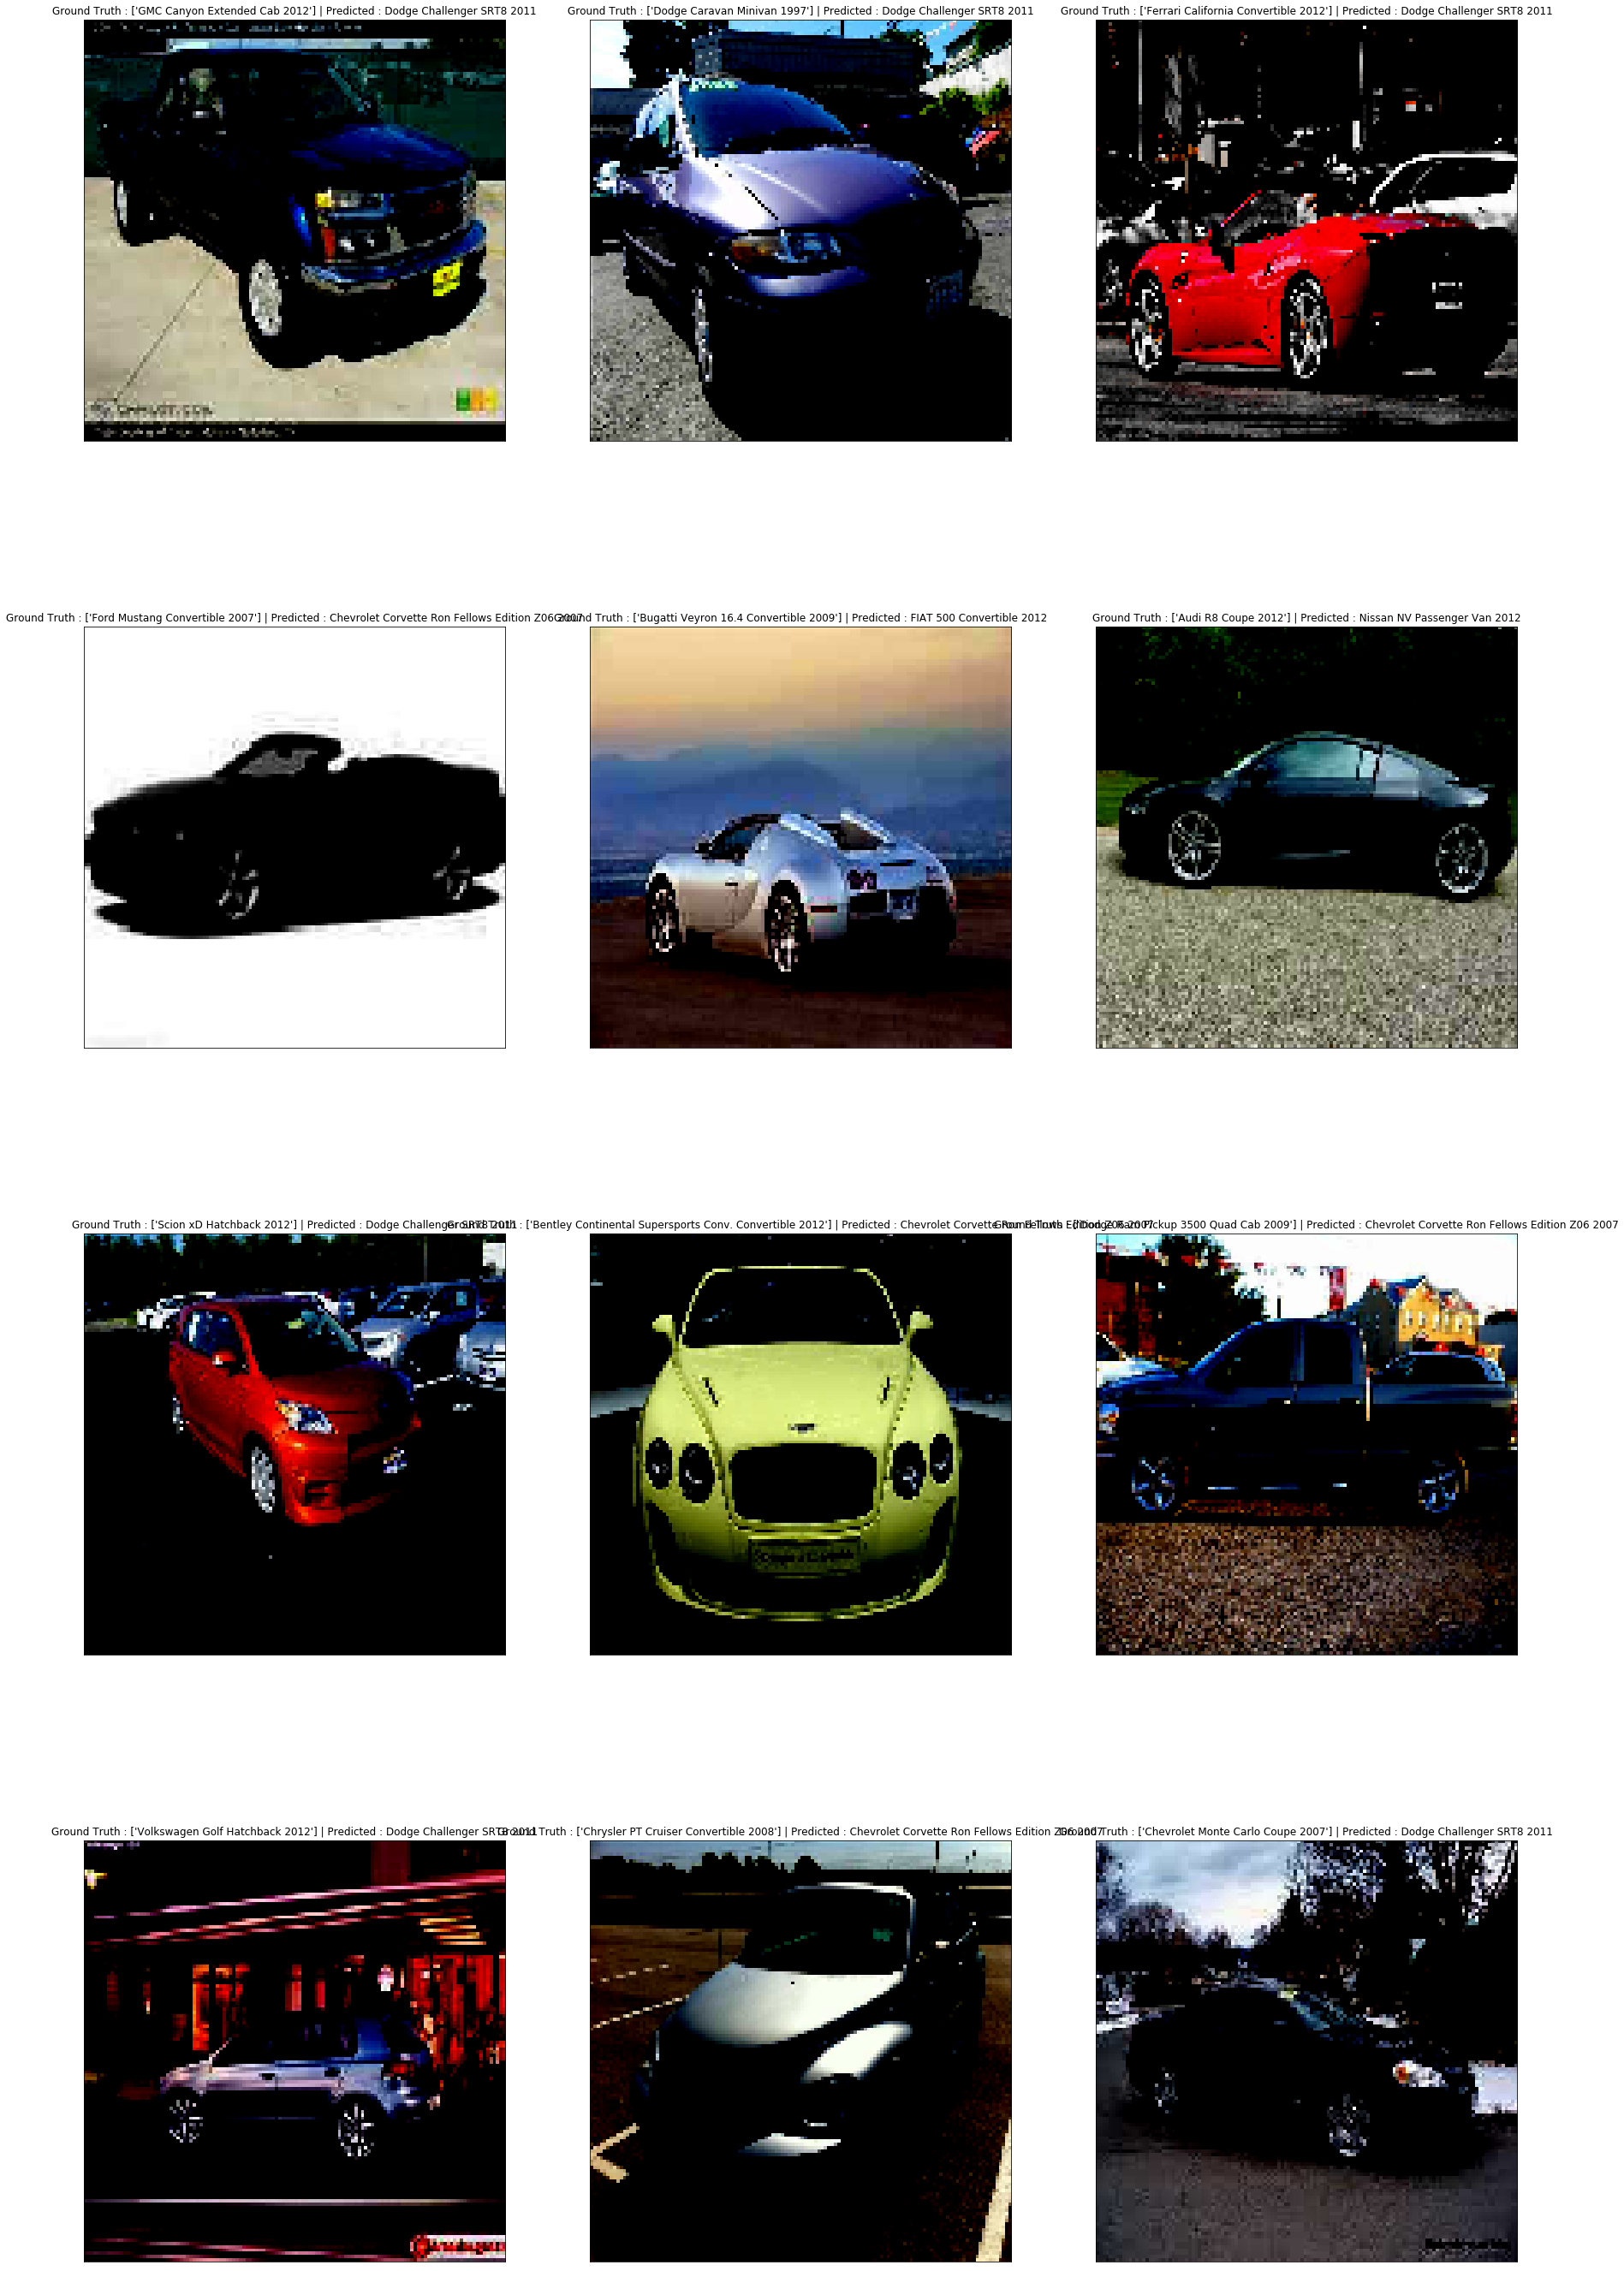

In [56]:
# n = 0
# for i in range(16):
#     n += 1
#     r = np.random.randint(0 , 784 , 1)
    
#     plt.figure(n , figsize = (15 , 9))
#     plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
#     plt.imshow(test_img[r][0])
#     plt.title('Ground Truth : {} | Predicted : {}'.format(ground_truth[r] , car_classes[pred_class[r][0]]))
#     plt.xticks([]) , plt.yticks([])
    
#     if n == 16:
#         break
        
# plt.show()
fig = plt.figure(figsize = (30,50))
for i in range(12):
    r = np.random.randint(0 , 784 , 1)
    plt_= fig.add_subplot(4,3,i+1)
    plt_.imshow(test_img[r][0])
    plt_ .set_title('Ground Truth : {} | Predicted : {}'.format(ground_truth[r] , car_classes[pred_class[r][0]]))
    plt.xticks([]) , plt.yticks([])